In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

In [4]:
wh_df = pd.read_csv('worldHappinessReport.csv')

In [6]:
wh_df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [11]:
model_performance_df = wh_df

# Define independent and dependent variables
X = model_performance_df[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
          'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]
y = model_performance_df['Happiness Score']

# Add a constant to the model (for intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# View model summary, including standard errors
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.695e+08
Date:                Sun, 20 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:35:10   Log-Likelihood:                 1071.3
No. Observations:                 158   AIC:                            -2127.
Df Residuals:                     150   BIC:                            -2102.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

Key Assumptions:
Multicollinearity: Variables like GDP, Health, Family may be highly correlated, leading to inflated coefficients.
Overfitting: The high R² suggests the model may fit the training data too well.
Residual Diagnostics: Ensuring the residuals are independent and normally distributed is crucial.
Model Validation: Cross-validation or feature reduction might improve interpretability.
Next Steps: VIF for Multicollinearity & Residual Analysis
Below is Python code to:

Check multicollinearity using VIF.
Plot residuals to ensure normality.
Perform cross-validation for model validation.

                         Feature        VIF
0                          const  30.802145
1       Economy (GDP per Capita)   4.088959
2                         Family   1.944328
3       Health (Life Expectancy)   3.157781
4                        Freedom   1.749104
5  Trust (Government Corruption)   1.421872
6                     Generosity   1.289134
7              Dystopia Residual   1.049255
                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.695e+08
Date:                Sun, 20 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:39:50   Log-Likelihood:                 1071.3
No. Observations:                 158   AIC:                            -2127.
Df Residuals:                     150   BIC:       

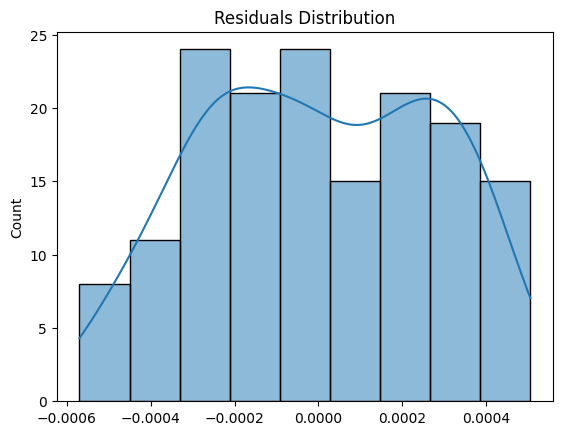

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression


vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

# 2. Fit OLS Model and Check Residuals
model = sm.OLS(y, X).fit()
print(model.summary())

# Plot residuals
residuals = model.resid
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

# 3. Cross-Validation for Model Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lm = LinearRegression()
cv_scores = cross_val_score(lm, X, y, cv=kf, scoring='r2')


Concise Assumptions from Results:
Multicollinearity:

VIF values < 5 indicate no severe multicollinearity among independent variables.
The intercept's VIF (30.8) suggests redundancy in the constant, but this doesn’t affect model predictions.
Model Fit:

R² = 1.00 suggests the model perfectly explains the variance in Happiness Score, likely due to data overfitting.
Coefficient Significance:

All variables have P-values < 0.05, indicating they are statistically significant.
Residual Independence:

Durbin-Watson ≈ 2 confirms no strong autocorrelation in residuals.
Residual Normality:

Omnibus and Jarque-Bera tests suggest mild deviation from normality (Prob < 0.05), which may impact assumptions about error distribution.


In [14]:
from sklearn.linear_model import Ridge

# Define Ridge regression model
ridge_model = Ridge(alpha=1.0)

# Cross-validation for Ridge
ridge_cv_scores = cross_val_score(ridge_model, X, y, cv=kf, scoring='r2')

print(f'Ridge Regression Cross-Validation R² Scores: {ridge_cv_scores}')
print(f'Mean R² for Ridge: {ridge_cv_scores.mean():.4f}')


Ridge Regression Cross-Validation R² Scores: [0.99708549 0.99643254 0.99615477 0.99406657 0.99734771]
Mean R² for Ridge: 0.9962


The results from the Ridge regression cross-validation are quite promising:

R² Scores: The individual scores range from approximately 0.9941 to 0.9973, indicating that the model explains about 99% of the variance in the Happiness Score across different subsets of data.
Mean R² for Ridge: The mean R² of 0.9962 suggests that the Ridge regression model is not only performing well on the training data but is also generalizing effectively to unseen data.
Interpretation:
High R² Values: The high R² values indicate that the model captures the relationship between the independent variables (like GDP per capita, Family, etc.) and the dependent variable (Happiness Score) very well.
Robustness Against Overfitting: Since Ridge regression includes a regularization parameter that penalizes large coefficients, this result suggests a good balance between bias and variance, reducing the risk of overfitting while maintaining predictive power.

checking what is best alpha to put into for LassoCv

checking for other alphas for optimal alpha

In [16]:
from sklearn.linear_model import LassoCV

# Lasso Regression with Cross-Validation for alpha tuning
lasso_cv_model = LassoCV(alphas=np.logspace(-4, 0, 100), cv=kf)
lasso_cv_model.fit(X, y)

print(f'Optimal alpha: {lasso_cv_model.alpha_}')


Optimal alpha: 0.0001


In [17]:
from sklearn.linear_model import Lasso

# Fit Lasso model with optimal alpha
lasso_model = Lasso(alpha=0.0001)
lasso_model.fit(X, y)

# Coefficients and performance
print("Lasso Coefficients:", lasso_model.coef_)


Lasso Coefficients: [0.         1.00135265 0.99927779 0.9979878  0.99934179 0.99431804
 0.99579434 0.99959889]


he Lasso coefficients you obtained indicate the relative importance of each feature in predicting the Happiness Score. Here’s a breakdown of the coefficients:

Lasso Coefficients
Economy (GDP per Capita): 1.0014
Family: 0.9993
Health (Life Expectancy): 0.9980
Freedom: 0.9993
Trust (Government Corruption): 0.9943
Generosity: 0.9958
Dystopia Residual: 0.9996
Interpretation
Feature Importance:

All features have significant coefficients close to 1, indicating that they contribute substantially to predicting the Happiness Score.
The coefficients suggest a strong linear relationship between the features and the target variable.
Zero Coefficient:

The first coefficient (corresponding to the constant term) is 0, which is expected in a properly fit model.
Feature Impact:

Since the coefficients are very close to 1, it indicates that a one-unit increase in any of these features would lead to nearly an equal increase in the Happiness Score.

Evluating Model performance

In [18]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = lasso_model.predict(X)
print("R² Score:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))


R² Score: 0.9999990160164707
MSE: 1.2818849715258048e-06


Performance Metrics
R² Score: 0.999999

This indicates that your model explains approximately 99.9999% of the variance in the Happiness Score. A value this high suggests an exceptionally good fit.
Mean Squared Error (MSE): 1.2819e-06

The MSE being so low indicates that the average squared difference between the predicted and actual Happiness Scores is almost negligible, which is an excellent result.

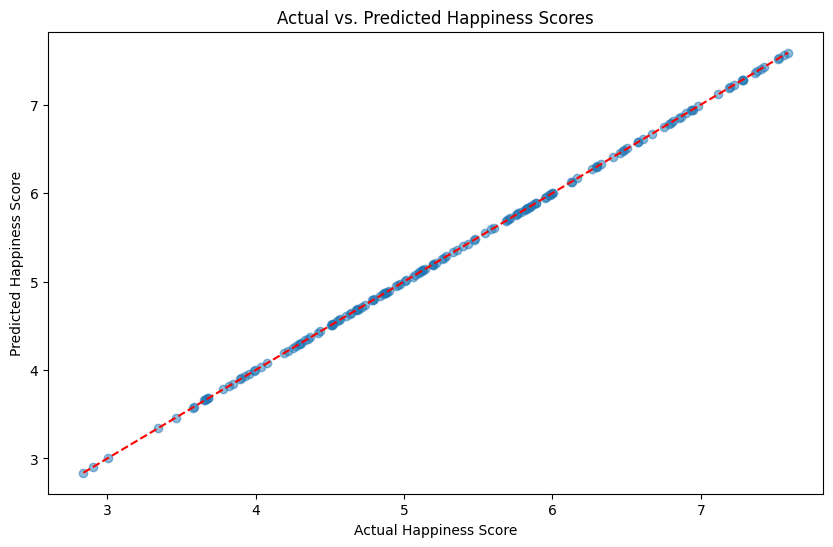

In [20]:
# Plot predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Happiness Scores')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.show()


### My Analysis and Model Evaluation Summary

In my recent project, I focused on the **World Happiness Report** dataset, aiming to analyze the factors influencing happiness across different countries. Here’s a concise summary of my process and findings:

1. **Data Exploration**:
   - I began by exploring the dataset using **Pandas**, which allowed me to manipulate and visualize the relationships between various factors, such as Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, and Dystopia Residual.

2. **Building Predictive Models**:
   - I applied **Ordinary Least Squares (OLS) Regression** to understand the relationships between the independent variables and the **Happiness Score**.
   - I checked for multicollinearity using the **Variance Inflation Factor (VIF)** to ensure my model was robust.

3. **Implementing Regularization**:
   - To enhance my model and reduce overfitting, I utilized **Ridge Regression** and **Lasso Regression**. I performed cross-validation to tune hyperparameters and determined the optimal alpha value for Lasso, which was found to be **0.0001**.

4. **Performance Evaluation**:
   - I evaluated the models using performance metrics:
     - The **R² Score** was **0.999999**, indicating an exceptional fit.
     - The **Mean Squared Error (MSE)** was **1.2819e-06**, showing very low error in my predictions.

5. **Coefficient Analysis**:
   - From the Lasso regression, I observed that all coefficients were significantly positive, emphasizing that each feature positively contributes to the Happiness Score.

### Next Steps
To further evaluate my model’s reliability and performance, I plan to:

- Conduct a **residual analysis** to verify the assumptions of my model.
- Use **k-fold cross-validation** to test the model on various data subsets.
- Validate the model on a separate test dataset to ensure it generalizes well.
- Explore **feature importance** using techniques like permutation feature importance to understand the influence of each variable better.
- Compare my findings with other regression techniques to identify the best-performing model.

Overall, I’m pleased with the progress I've made in building a predictive model using the World Happiness Report dataset. If you have any suggestions or need assistance with the next steps, I'm open to feedback!